In [10]:
import xgboost
import shap

import matplotlib.pyplot as plt
from scipy.integrate import simps
from Ev_Search import ML
from Ev_Search.loaders import filter_data
import numpy as np
import operator
import pandas as pd

import Ev_Search.Tools_For_Anal as A

In [11]:
shap.initjs()

In [12]:
items = A.load_file('Stats/BMI_best_keys(1).txt')

In [71]:
n = 50
sl = 0

fc, feat_count = A.get_weighted_feature_counts(items, score_lim=sl)
top_feats = A.get_sorted_labels(fc, n)

train, val = A.load_saved('Data/BMI_data.csv', 'Data/BMI_val_data.csv', top_feats, True)

X_df = train.drop('score', axis=1)
X_val_df = val.drop('score', axis=1)
X = np.array(X_df)
X_val = np.array(X_val_df)
y = np.array(train.score)
y_val = np.array(val.score)

In [48]:
model = ML.train_regression_model(X, y, model_type='full lightgbm', cv=3)

In [66]:
model2 = ML.train_regression_model(X, y, model_type='elastic cv', cv=3)

In [59]:
list(X_df)

['rsfmri_cor_networkgordon_smhand_networkgordon_smmouth',
 'rh_G_and_S_frontomargin_thick',
 'rh_G_and_S_frontomargin_thick-std',
 '4th-Ventricle_norm-mean',
 'rh_S_front_middle_thick-std',
 'rh_S_front_middle_thick',
 'Left-Cerebellum-Cortex_volume',
 'Left-Cerebellum-White-Matter_volume',
 'Right-Cerebellum-White-Matter_volume',
 'rh_G_parietal_sup_thick',
 'rh_G_cuneus_thick-std',
 '3rd-Ventricle_volume',
 'Right-Putamen_norm-mean',
 'Left-VentralDC_norm-mean',
 'Right-VentralDC_norm-mean',
 'Optic-Chiasm_norm-mean',
 'rh_G_and_S_transv_frontopol_volume',
 'lh_Pole_occipital_thick',
 'lh_G_oc-temp_med-Parahip_mean-curv',
 'lh_S_oc_sup_and_transversal_thick',
 'lh_G_oc-temp_lat-fusifor_thick-std',
 'lh_S_calcarine_thick',
 'lh_G_occipital_middle_curv-ind',
 'rsfmri_cor_networkgordon_cingulooperc_networkgordon_cingulooperc',
 'rh_S_circular_insula_inf_mean-curv',
 'Large_reward_vs_neutral_anticipation-lh-S_intrapariet_and_P_trans',
 'rh_G_front_middle_surf',
 'rsfmri_cor_networkgordon_auditory_networkgordon_cingulooperc',
 'Brain-Stem_volume',
 'lh_G_cuneus_thick-std',
 '4th-Ventricle_volume',
 'Large_reward_vs_neutral_anticipation-lh-S_interm_prim-Jensen',
 'Right-Caudate_norm-mean',
 'rh_G_oc-temp_med-Parahip_mean-curv',
 'rh_G_parietal_sup_surf',
 'Right-Cerebellum-Cortex_volume',
 'lh_G_and_S_transv_frontopol_thick',
 'lh_G_and_S_cingul-Ant_thick',
 'lh_S_precentral-inf-part_surf',
 '3rd-Ventricle_norm-mean',
 'lh_S_front_middle_thick',
 'rh_G_orbital_thick',
 'rh_Pole_temporal_volume',
 'lh_G_and_S_frontomargin_thick',
 'CSF_volume',
 'rsfmri_cor_networkgordon_salience_networkgordon_ventralattn',
 'Right-Hippocampus_norm-mean',
 'rh_G_and_S_cingul-Ant_thick',
 'rh_G_and_S_transv_frontopol_thick',
 'Left-Caudate_norm-mean']

In [76]:
explainer = shap.TreeExplainer(model, X)

In [77]:
shap_values = explainer.shap_values(X_val)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_val_df.iloc[1,:])

In [78]:
#shap.force_plot(explainer.expected_value, shap_values[1:100,:], X_df.iloc[1:100,:])

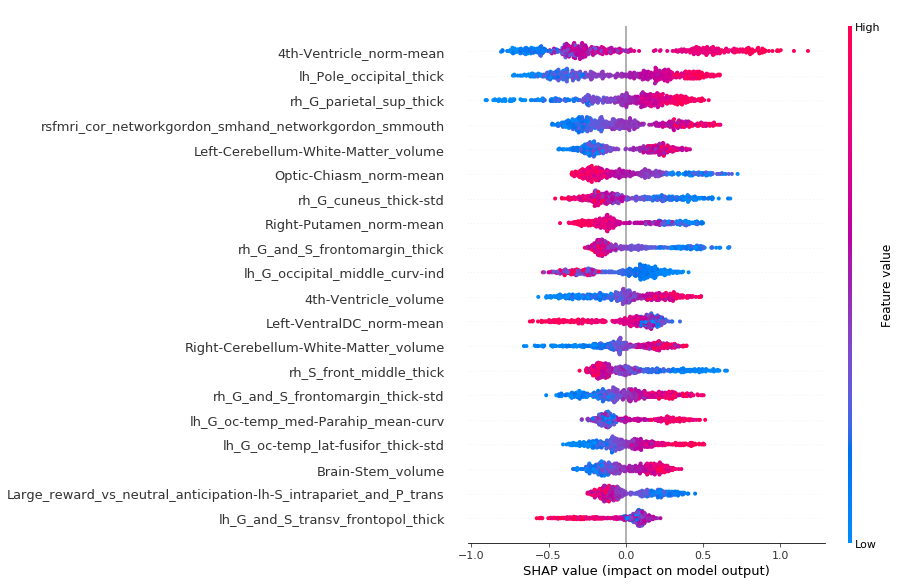

In [79]:
shap.summary_plot(shap_values, X_val_df)

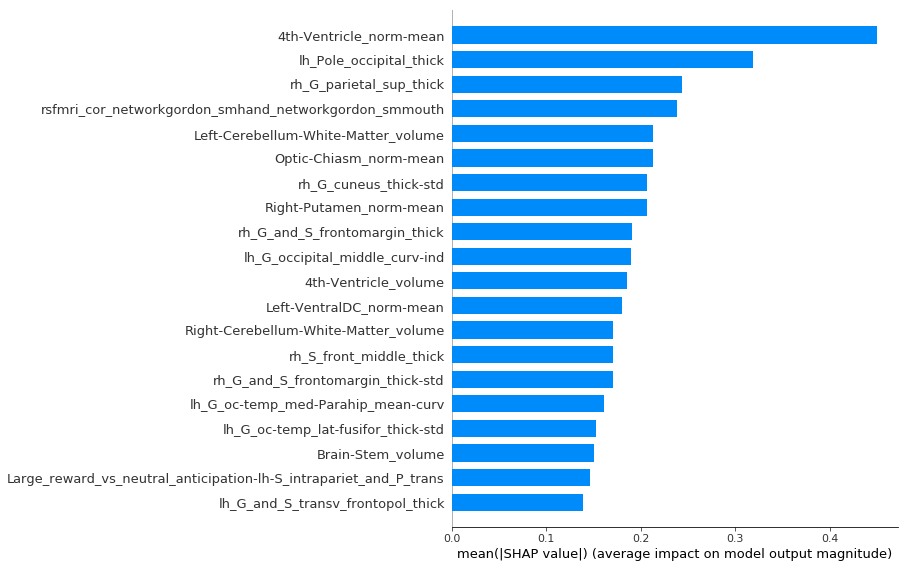

In [80]:
shap.summary_plot(shap_values, X_df, plot_type="bar")

In [81]:
explainer = shap.LinearExplainer(model2, X, feature_dependence="independent")

In [82]:
shap_values = explainer.shap_values(X_val)

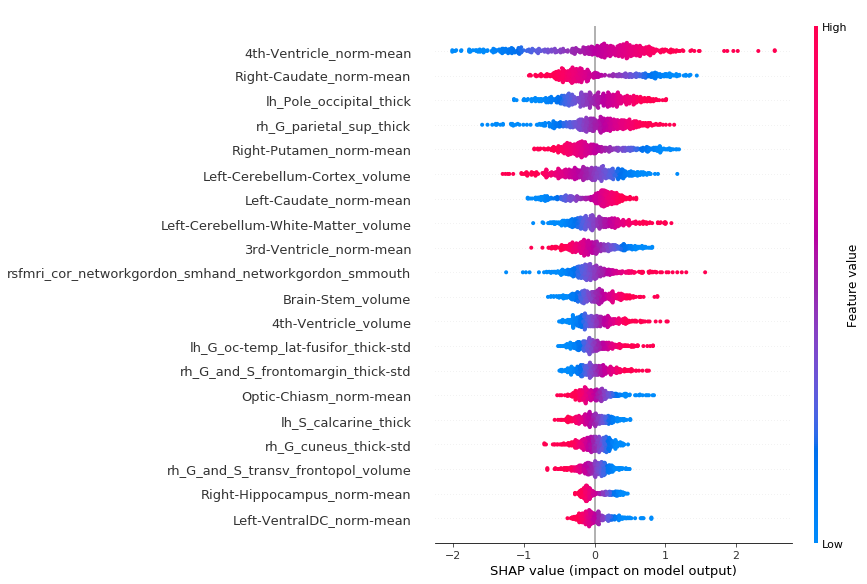

In [83]:
shap.summary_plot(shap_values, X_val_df)

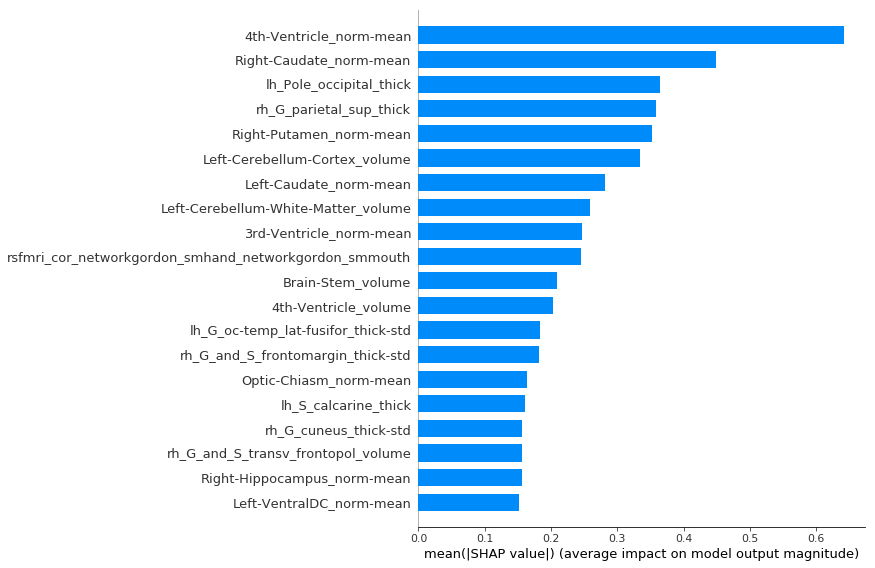

In [84]:
shap.summary_plot(shap_values, X_df, plot_type="bar")